In [2]:
# Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime

In [3]:
# For tracking changes in data generated through script and GEE attribution dataset
Dataset_version = 1
GEE_data_version = 0
Python_script_version = 1
Year = '(2001-2022)'

home_folder = '/home/chandra/backup/Chalmers/'
Simulation_version = 'DeDuCE v'+str(Dataset_version)+'.'+str(GEE_data_version)+'.'+str(Python_script_version)+' ' + Year

In [4]:
home_folder = '/home/chandra/backup/Chalmers/'
Simulation_version = 'DeDuCE v'+str(Dataset_version)+'.'+str(GEE_data_version)+'.'+str(Python_script_version)+' ' + Year

In [5]:
# Custom function to calculate the weighted mean
def weighted_mean(group):
    quality_index = group['Quality Index']
    weights = group['Deforestation attribution, unamortized (ha)']
    try:
        return (quality_index * weights).sum() / weights.sum()
    except ZeroDivisionError:
        return np.nan

## Reference

In [5]:
Reference = pd.read_excel(f'{home_folder}{Simulation_version}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [6]:
Reference['Group'] = 1
Agg_results = Reference.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [7]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,121794096.28,44117.68,0.49


### Reference (post-2020)

In [41]:
Agg_results = Reference.loc[Reference.Year >= 2020].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [42]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,13605957.26,5576.80,0.38


### Reference (Only TMF countries)

In [51]:
Agg_results = Reference.loc[Reference['Producer country'].isin(S4['Producer country'].unique())].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [52]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,100460663.30,42824.52,0.52


### Reference (Forest plantation)

In [19]:
Agg_results = Reference.loc[Reference['Commodity group'] == 'Forest plantation'].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [20]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,16989601.04,-248.09,0.33


In [70]:
Agg_results = Reference.loc[Reference['Producer country'].isin(S6['Producer country'].unique())].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [71]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,67161919.12,28469.42,0.64


### Individual commodities

In [46]:
Agg_results = Reference.loc[(Reference['Commodity'] == 'Oil palm fruit') & (Reference['Producer country'] == 'Indonesia')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,7790477.41,4249.87,0.93


In [47]:
Agg_results = Reference.loc[(Reference['Commodity'] == 'Cocoa beans') & (Reference['Producer country'] == 'Côte d\'Ivoire')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,896994.10,238.16,0.79


In [48]:
Agg_results = Reference.loc[(Reference['Commodity'] == 'Soya beans') & (Reference['Producer country'] == 'Brazil')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,3461413.18,1020.95,0.85


### Reference (Amortised 2020)

In [81]:
Agg_results = Reference.loc[Reference['Year'] == 2020].groupby(['Group']).sum().reset_index()

/tmp/user/1011/ipykernel_526682/2950878273.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Agg_results = Reference.loc[Reference['Year'] == 2020].groupby(['Group']).sum().reset_index()


In [82]:
Agg_results[['Deforestation risk, amortized (ha)', 'Deforestation emissions incl. peat drainage, amortized (MtCO2)']].style.format({
    'Deforestation risk, amortized (ha)': '{:.2f}',
    'Deforestation emissions incl. peat drainage, amortized (MtCO2': '{:.2f}',
})

,"Deforestation risk, amortized (ha)","Deforestation emissions incl. peat drainage, amortized (MtCO2)"
0,5644532.32,2112.966089


### Reference (Only Brazil)

In [127]:
Agg_results = Reference.loc[Reference['Producer country'] == 'Brazil'].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [128]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,38329215.65,16996.50,0.61


## S1 (Treecover 10)

In [25]:
Sensitivity = 'Sensitivity analyses/S1 (Treecover 10)'
S1 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [28]:
S1['Group'] = 1
Agg_results = S1.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [29]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,129821625.71,44742.28,0.49


## S2 (Treecover 75)

In [30]:
Sensitivity = 'Sensitivity analyses/S2 (Treecover 75)'
S2 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [33]:
S2['Group'] = 1
Agg_results = S2.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [34]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,85276875.32,39279.85,0.50


## S3 (JRC Forest cover)

In [35]:
Sensitivity = 'Sensitivity analyses/S3 (JRC Forest cover)'
S3 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [36]:
S3['Group'] = 1
Agg_results = S3.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [37]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,12088808.04,3361.76,0.34


## S4 (TMF Deforestation)

In [6]:
Sensitivity = 'Sensitivity analyses/S4 (Deforestation)'
S4 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [7]:
S4['Group'] = 1
Agg_results = S4.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [8]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,72163857.91,34756.79,0.52


In [9]:
Agg_results = S4.loc[(S4['Commodity'] == 'Cocoa beans') & (S4['Producer country'] == 'Côte d\'Ivoire')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,1298211.43,302.18,0.79


## S5 (No forest plantation)

In [21]:
Sensitivity = 'Sensitivity analyses/S5 (No forest plantation)'
S5 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [22]:
S5['Group'] = 1
Agg_results = S5.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [23]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,121756873.72,44116.42,0.49


In [24]:
S5['Group'] = 1
Agg_results = S5.loc[S5['Commodity group'] == 'Forest plantation'].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [25]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,16961349.80,-247.08,0.32


## S6 (Spatial lag 1)

In [66]:
Sensitivity = 'Sensitivity analyses/S6 (Spatial lag 1)'
S6 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [67]:
S6['Group'] = 1
Agg_results = S6.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [68]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,60479552.47,25915.43,0.62


## S7 (Spatial lag 5)

In [72]:
Sensitivity = 'Sensitivity analyses/S7 (Spatial lag 5)'
S7 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [73]:
S7['Group'] = 1
Agg_results = S7.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [74]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,70013040.31,29556.75,0.64


## S8 (Statistical lag 1)

In [113]:
Sensitivity = 'Sensitivity analyses/S8 (Statistical lag 1)'
S8 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [114]:
S8['Group'] = 1
Agg_results = S8.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [115]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,120912240.99,43749.29,0.49


## S9 (Statistical lag 5)

In [116]:
Sensitivity = 'Sensitivity analyses/S9 (Statistical lag 5)'
S9 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [117]:
S9['Group'] = 1
Agg_results = S9.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [118]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,121909645.23,44353.82,0.49


## S10 (Universal lag 1)

In [119]:
Sensitivity = 'Sensitivity analyses/S10 (Universal lag 1)'
S10 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [120]:
S10['Group'] = 1
Agg_results = S10.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [121]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,60454479.29,25953.81,0.62


## S11 (Universal lag 5)

In [124]:
Sensitivity = 'Sensitivity analyses/S11 (Universal lag 5)'
S11 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [125]:
S11['Group'] = 1
Agg_results = S11.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [126]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,70017034.14,29538.10,0.64


## S12 (Dominant driver)

In [49]:
Sensitivity = 'Sensitivity analyses/S12 (Dominant driver)'
S12 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [50]:
S12['Group'] = 1
Agg_results = S12.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [51]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,171153029.01,61534.10,0.29


In [52]:
Agg_results = S12.loc[(S12['Commodity'] == 'Oil palm fruit') & (S12['Producer country'] == 'Indonesia')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,9326754.36,5899.88,0.27


In [53]:
Agg_results = S12.loc[(S12['Commodity'] == 'Cocoa beans') & (S12['Producer country'] == 'Côte d\'Ivoire')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,634953.02,136.79,0.25


In [54]:
Agg_results = S12.loc[(S12['Commodity'] == 'Soya beans') & (S12['Producer country'] == 'Brazil')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,11589175.05,4834.79,0.31


In [61]:
S12.loc[(S12['Commodity'] == 'Cocoa beans') & (S12['Producer country'] == 'Côte d\'Ivoire')]

,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,Group
46838,Africa,CIV,Côte d'Ivoire,2001,"Stimulant, spice and aromatic crops",Cocoa beans,20419.557810,NaN,5.382733,NaN,0.002704,0.002704,0.293751,1
46839,Africa,CIV,Côte d'Ivoire,2002,"Stimulant, spice and aromatic crops",Cocoa beans,31035.055365,NaN,8.062092,NaN,0.006570,0.006570,0.293839,1
46840,Africa,CIV,Côte d'Ivoire,2003,"Stimulant, spice and aromatic crops",Cocoa beans,13062.831452,NaN,3.271978,NaN,0.008204,0.008204,0.293855,1
46841,Africa,CIV,Côte d'Ivoire,2004,"Stimulant, spice and aromatic crops",Cocoa beans,15829.238392,NaN,3.860061,NaN,0.009742,0.009742,0.293757,1
46842,Africa,CIV,Côte d'Ivoire,2005,"Stimulant, spice and aromatic crops",Cocoa beans,9844.744974,18038.285599,2.095676,4.534508,0.010687,4.545195,0.293753,1
46843,Africa,CIV,Côte d'Ivoire,2006,"Stimulant, spice and aromatic crops",Cocoa beans,0.000000,13954.374037,0.000000,3.457961,0.010687,3.468648,NaN,1
46844,Africa,CIV,Côte d'Ivoire,2007,"Stimulant, spice and aromatic crops",Cocoa beans,0.000000,7747.362964,0.000000,1.845543,0.010687,1.856230,NaN,1
46845,Africa,CIV,Côte d'Ivoire,2008,"Stimulant, spice and aromatic crops",Cocoa beans,0.000000,5134.796673,0.000000,1.191147,0.010687,1.201834,NaN,1
46846,Africa,CIV,Côte d'Ivoire,2009,"Stimulant, spice and aromatic crops",Cocoa beans,13209.801429,4610.909281,3.591121,1.137359,0.021218,1.158577,0.293700,1
46847,Africa,CIV,Côte d'Ivoire,2010,"Stimulant, spice and aromatic crops",Cocoa beans,24485.112475,7538.982781,6.284509,1.975126,0.024664,1.999790,0.233683,1


## S13 (Hansen forest loss only)

In [55]:
Sensitivity = 'Sensitivity analyses/S13 (Hansen loss)'
S13 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [56]:
S13['Group'] = 1
Agg_results = S13.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [57]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,226530991.23,76377.45,0.38


In [141]:
len(S15['Producer country'].unique())

180

In [58]:
Agg_results = S13.loc[(S13['Commodity'] == 'Oil palm fruit') & (S13['Producer country'] == 'Indonesia')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,9369761.42,5787.82,0.36


In [59]:
Agg_results = S13.loc[(S13['Commodity'] == 'Cocoa beans') & (S13['Producer country'] == 'Côte d\'Ivoire')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,637999.30,137.75,0.34


In [60]:
Agg_results = S13.loc[(S13['Commodity'] == 'Soya beans') & (S13['Producer country'] == 'Brazil')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,8716919.54,3532.75,0.42


## S15.1 (No cropland over pasture)

In [9]:
Sensitivity = 'Sensitivity analyses/S15.1 (No cropland over pasture)'
S15_1 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [10]:
S15_1['Group'] = 1
Agg_results = S15_1.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [11]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,122067976.98,44249.30,0.49


## S15.2 (Net land-use change)

In [138]:
Sensitivity = 'Sensitivity analyses/S15.2 (Net expansion)'
S15 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [139]:
S15['Group'] = 1
Agg_results = S15.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [140]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,112500733.88,40060.19,0.51


## S16 (Restrcted by FAOSTAT)

In [142]:
Sensitivity = 'Sensitivity analyses/S16 (All land-use restricted)'
S16 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [143]:
S16['Group'] = 1
Agg_results = S16.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [144]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,120295888.04,43389.09,0.49


## S17 (Not Restrcted by FAOSTAT)

In [145]:
Sensitivity = 'Sensitivity analyses/S17 (All land-use not restricted)'
S17 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [146]:
S17['Group'] = 1
Agg_results = S17.groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [147]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,147103233.33,56508.02,0.45


## S18 (Multi-cropping)

In [148]:
Sensitivity = 'Sensitivity analyses/S18 (Brazil multi-cropping)'
S18 = pd.read_excel(f'{home_folder}{Simulation_version}/{Sensitivity}/Generated_results/DeDuCE_Deforestation_attribution_v{Dataset_version}.{GEE_data_version}.{Python_script_version} {Year}.xlsx')

In [152]:
S18['Group'] = 1
Agg_results = S18.loc[S18['Commodity'] == 'Maize (corn)'].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [153]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,724623.86,207.44,0.42


In [164]:
Agg_results = S18.loc[S18['Commodity'] == 'Beans, dry'].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [165]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,239454.86,67.23,0.45


In [170]:
Agg_results = S18.loc[S18['Commodity'] == 'Potatoes'].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [171]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,8533.94,3.17,0.48


In [172]:
Agg_results = S18.loc[S18['Commodity'] == 'Groundnuts, excluding shelled'].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [173]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,7730.33,2.48,0.47


In [158]:
Agg_results = Reference.loc[(Reference['Producer country'] == 'Brazil') & (Reference['Commodity'] == 'Maize (corn)')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [159]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,535247.50,152.72,0.43


In [160]:
Agg_results = Reference.loc[(Reference['Producer country'] == 'Brazil') & (Reference['Commodity'] == 'Beans, dry')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [161]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,200273.84,52.07,0.45


In [166]:
Agg_results = Reference.loc[(Reference['Producer country'] == 'Brazil') & (Reference['Commodity'] == 'Potatoes')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [167]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,5780.78,2.27,0.48


In [168]:
Agg_results = Reference.loc[(Reference['Producer country'] == 'Brazil') & (Reference['Commodity'] == 'Groundnuts, excluding shelled')].groupby(['Group']).apply(
                lambda group: pd.Series({
                    'Deforestation attribution, unamortized (ha)': group['Deforestation attribution, unamortized (ha)'].sum(),
                    'Deforestation emissions excl. peat drainage, unamortized (MtCO2)': group['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'].sum(),
                    'Peatland drainage emissions (MtCO2)': group['Peatland drainage emissions (MtCO2)'].sum(),
                    'Quality Index': weighted_mean(group)})
                ).reset_index()

# Add a new column for the total emissions
Agg_results['Total emissions (MtCO2)'] = (
    Agg_results['Deforestation emissions excl. peat drainage, unamortized (MtCO2)'] +
    Agg_results['Peatland drainage emissions (MtCO2)']
)

In [169]:
Agg_results[['Deforestation attribution, unamortized (ha)', 'Total emissions (MtCO2)', 'Quality Index']].style.format({
    'Deforestation attribution, unamortized (ha)': '{:.2f}',
    'Total emissions (MtCO2)': '{:.2f}',
    'Quality Index': '{:.2f}'
})

,"Deforestation attribution, unamortized (ha)",Total emissions (MtCO2),Quality Index
0,8323.49,2.73,0.45


## S19 (Amortised period)-10 years

In [104]:
Reference.loc[(Reference.Year >=2011) & (Reference.Year <=2020)].sum()[['Deforestation attribution, unamortized (ha)', 'Deforestation emissions excl. peat drainage, unamortized (MtCO2)']]/10

Deforestation attribution, unamortized (ha)                         5611693.464811
Deforestation emissions excl. peat drainage, unamortized (MtCO2)        1851.08677
dtype: object

In [105]:
Reference.loc[(Reference.Year ==2020)].sum()['Peatland drainage emissions (MtCO2)']

238.08209237166633

In [106]:
1851.08677+238.082092

2089.168862

## S20 (Amortised period)-15 years

In [107]:
Reference.loc[(Reference.Year >=2006) & (Reference.Year <=2020)].sum()[['Deforestation attribution, unamortized (ha)', 'Deforestation emissions excl. peat drainage, unamortized (MtCO2)']]/15

Deforestation attribution, unamortized (ha)                         5739464.053993
Deforestation emissions excl. peat drainage, unamortized (MtCO2)       1922.303493
dtype: object

In [108]:
Reference.loc[(Reference.Year ==2020)].sum()['Peatland drainage emissions (MtCO2)']

238.08209237166633

In [109]:
1922.303493+238.082092

2160.385585

## S21 (Amortised period)-20 years

In [110]:
Reference.loc[(Reference.Year >=2001) & (Reference.Year <=2020)].sum()[['Deforestation attribution, unamortized (ha)', 'Deforestation emissions excl. peat drainage, unamortized (MtCO2)']]/20

Deforestation attribution, unamortized (ha)                         5625950.32943
Deforestation emissions excl. peat drainage, unamortized (MtCO2)      1896.132004
dtype: object

In [111]:
Reference.loc[(Reference.Year ==2020)].sum()['Peatland drainage emissions (MtCO2)']

238.08209237166633

In [112]:
1896.132004+238.082092

2134.214096

In [182]:
S15.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]

/tmp/user/1011/ipykernel_526682/1880093616.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  S15.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]


,ISO,"Deforestation attribution, unamortized (ha)"
0,AFG,3.574831e+02
1,AGO,9.431546e+05
2,ALB,1.079993e+04
3,ARG,3.909524e+06
4,ARM,7.436638e+02
...,...,...
175,VUT,1.322755e+03
176,YEM,2.246056e-01
177,ZAF,3.605527e+04
178,ZMB,5.658150e+05


In [183]:
Reference.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]

/tmp/user/1011/ipykernel_526682/4008099204.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Reference.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]


,ISO,"Deforestation attribution, unamortized (ha)"
0,AFG,4.420508e+02
1,AGO,1.229576e+06
2,ALB,1.104088e+04
3,ARG,3.910145e+06
4,ARM,1.011516e+03
...,...,...
176,VUT,4.490162e+03
177,YEM,2.246056e-01
178,ZAF,2.109406e+05
179,ZMB,7.190740e+05


In [12]:
import pandas as pd

# Assuming you have your dataframes named as reference_df and s15_df
reference_df = Reference.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]
s15_df = S15_1.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]

# Rename columns to avoid confusion during merge
reference_df.rename(columns={'Deforestation attribution, unamortized (ha)': 'Reference Deforestation (ha)'}, inplace=True)
s15_df.rename(columns={'Deforestation attribution, unamortized (ha)': 'S15 Deforestation (ha)'}, inplace=True)

# Merge the dataframes on 'ISO'
merged_df = pd.merge(reference_df, s15_df, on='ISO', how='inner')

# Calculate the percentage change
merged_df['% Change from Reference'] = ((merged_df['S15 Deforestation (ha)'] - merged_df['Reference Deforestation (ha)']) / merged_df['Reference Deforestation (ha)']) * 100

# Handle cases where Reference Deforestation is 0 to avoid division by zero
merged_df['% Change from Reference'] = merged_df['% Change from Reference'].replace([float('inf'), -float('inf')], None)


/tmp/user/1011/ipykernel_2508806/457932598.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reference_df = Reference.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]
/tmp/user/1011/ipykernel_2508806/457932598.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s15_df = S15_1.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]


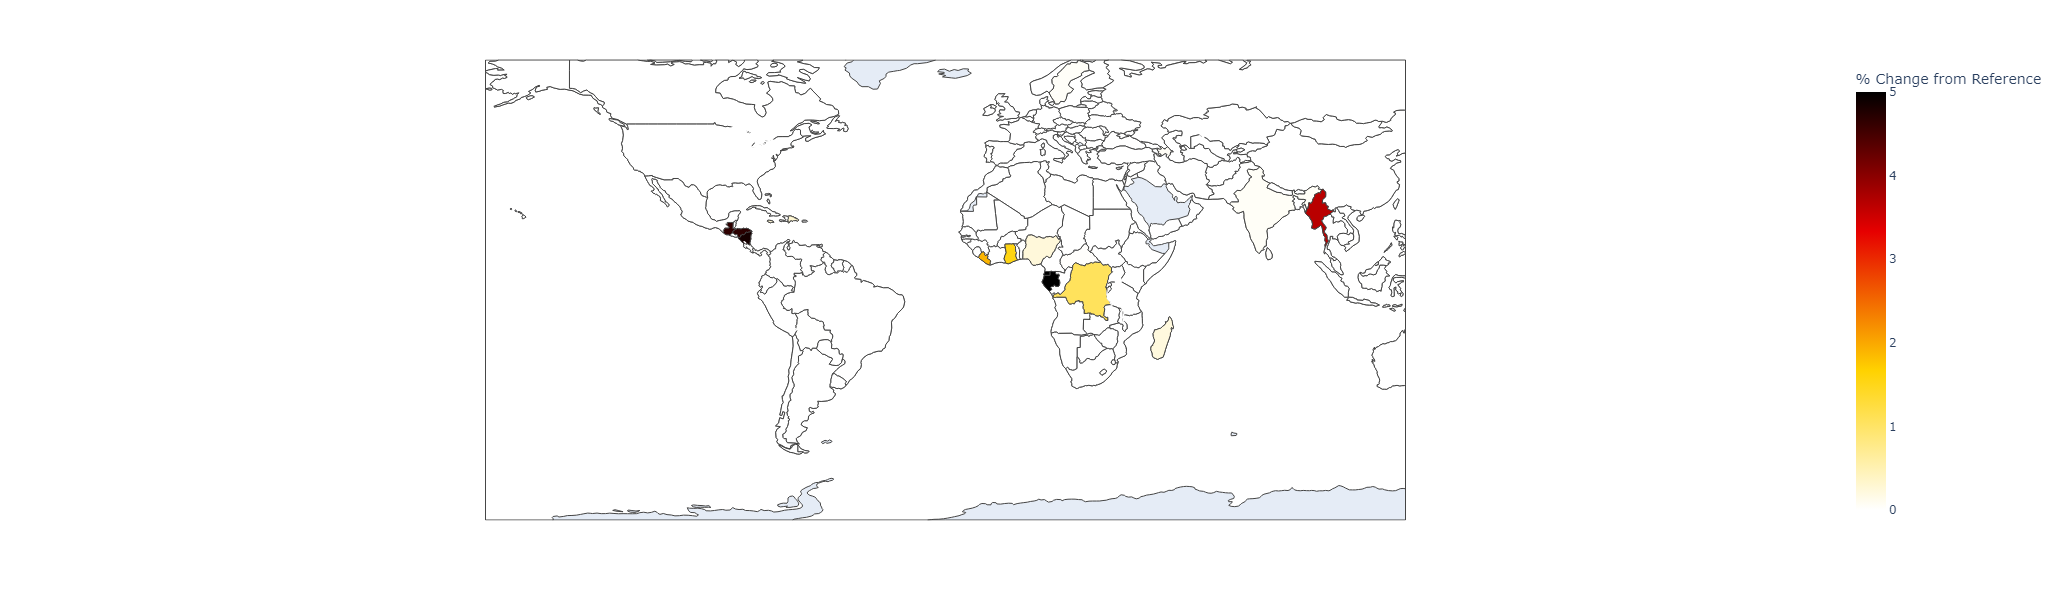

In [18]:
import plotly.express as px

fig = px.choropleth(merged_df, locations="ISO",
                    color="% Change from Reference", # lifeExp is a column of gapminder
                    hover_name="ISO", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Hot_r,
                   range_color=(0, 5))
# Update layout for the entire figure
fig.update_layout(
    #title_text='Deforestation Attribution by Commodity',
    autosize=False,
    width=1000,
    height=600,
    showlegend=False,
)
fig.show()

In [217]:
import pandas as pd

# Assuming you have your dataframes named as reference_df and s15_df
reference_df = Reference.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]
s12_df = S12.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]

# Rename columns to avoid confusion during merge
reference_df.rename(columns={'Deforestation attribution, unamortized (ha)': 'Reference Deforestation (ha)'}, inplace=True)
s12_df.rename(columns={'Deforestation attribution, unamortized (ha)': 'S15 Deforestation (ha)'}, inplace=True)

# Merge the dataframes on 'ISO'
merged_df = pd.merge(reference_df, s12_df, on='ISO', how='inner')

# Calculate the percentage change
merged_df['% Change from Reference'] = ((merged_df['S15 Deforestation (ha)'] - merged_df['Reference Deforestation (ha)']) / merged_df['Reference Deforestation (ha)']) * 100

# Handle cases where Reference Deforestation is 0 to avoid division by zero
merged_df['% Change from Reference'] = merged_df['% Change from Reference'].replace([float('inf'), -float('inf')], None)


/tmp/user/1011/ipykernel_526682/4087660131.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/user/1011/ipykernel_526682/4087660131.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



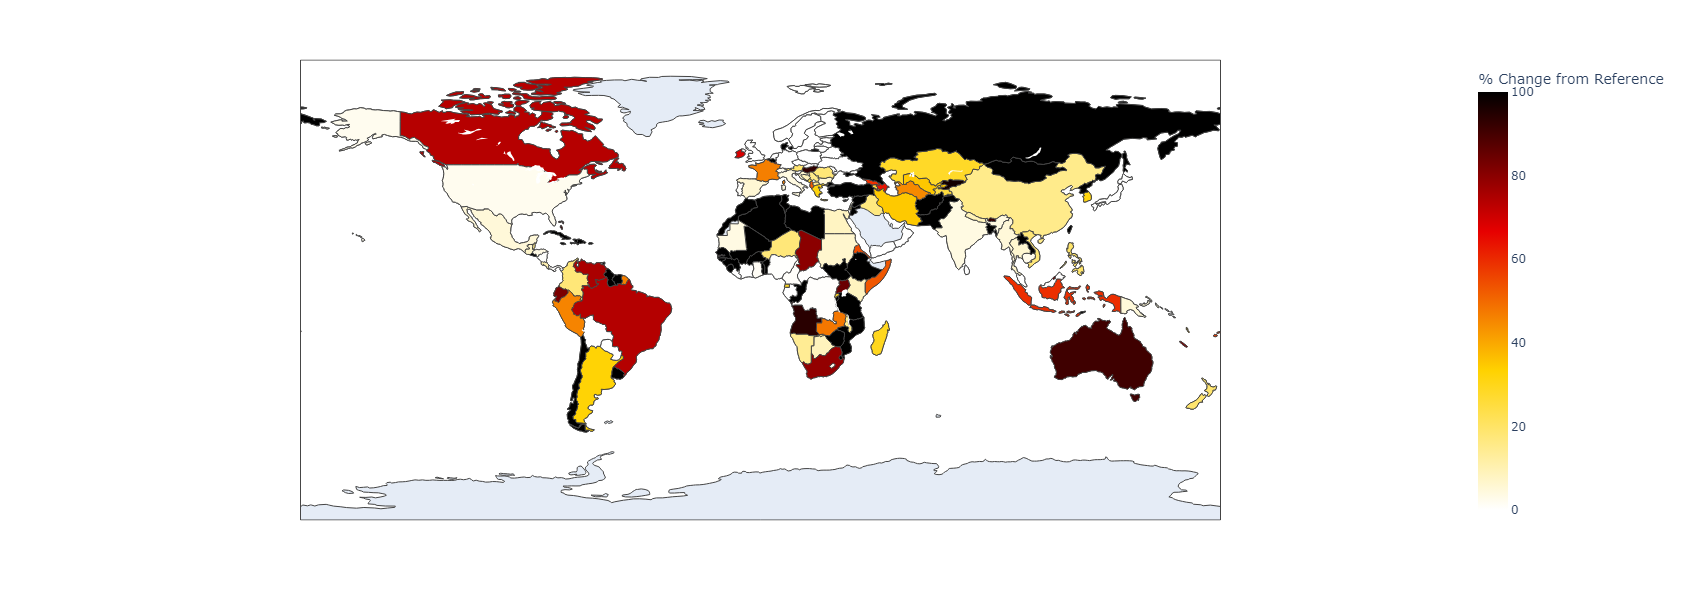

In [222]:
import plotly.express as px

fig = px.choropleth(merged_df, locations="ISO",
                    color="% Change from Reference", # lifeExp is a column of gapminder
                    hover_name="ISO", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Hot_r,
                   range_color=(0, 100),)
# Update layout for the entire figure
fig.update_layout(
    #title_text='Deforestation Attribution by Commodity',
    autosize=False,
    width=1000,
    height=600,
    showlegend=False,
)
fig.show()

In [43]:
Reference.loc[(Reference['Producer country'].isin(['United States'])) & (Reference['Commodity group'] == 'Forest plantation')].groupby('Year').sum()

/tmp/user/1011/ipykernel_2508806/1154939791.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,Group
Year,,,,,,,,
2001,387900.0,0.0,-31.299991,0.000000,0.053244,0.053244,0.254013,1
2002,387900.0,0.0,-25.268163,0.000000,0.102375,0.102375,0.253915,1
2003,387900.0,0.0,-23.552014,0.000000,0.135713,0.135713,0.253846,1
2004,387900.0,0.0,-24.297128,0.000000,0.196922,0.196922,0.254115,1
2005,387900.0,387900.0,-28.381042,-26.559668,0.255887,-26.303781,0.254301,1
2006,387900.0,387900.0,-26.910656,-25.681801,0.316925,-25.364875,0.254541,1
2007,387900.0,387900.0,-32.079136,-27.043995,0.382984,-26.661012,0.337275,1
2008,294800.0,369280.0,-22.848889,-26.903370,0.454877,-26.448493,0.256703,1
2009,201700.0,332040.0,-17.170348,-25.478014,0.513910,-24.964104,0.257256,1


In [38]:
S5.loc[(S5['Producer country'].isin(['United States', 'China'])) & (S5['Commodity group'] == 'Forest plantation')].groupby('Producer country').sum()

/tmp/user/1011/ipykernel_2508806/285795567.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Year,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,Group
Producer country,,,,,,,,,
China,44253,6.620158e+06,5.445368e+06,-309.194618,-232.071747,0.501394,-231.570352,6.277621,22
United States,44253,4.531200e+06,3.755400e+06,-367.269168,-312.788046,13.714231,-299.073816,4.652159,22


In [41]:
(6.620158e+06-6.620322e+06)*100/6.620322e+06	

-0.0024772208965062425

In [ ]:
(6.620322e+06-6.620158e+06)*100/6.620158e+06

In [26]:
import pandas as pd

# Assuming you have your dataframes named as reference_df and s15_df
reference_df = Reference.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]
s5_df = S5.groupby(['ISO']).sum().reset_index()[['ISO', 'Deforestation attribution, unamortized (ha)']]

# Rename columns to avoid confusion during merge
reference_df.rename(columns={'Deforestation attribution, unamortized (ha)': 'Reference Deforestation (ha)'}, inplace=True)
s5_df.rename(columns={'Deforestation attribution, unamortized (ha)': 'S15 Deforestation (ha)'}, inplace=True)

# Merge the dataframes on 'ISO'
merged_df = pd.merge(reference_df, s5_df, on='ISO', how='inner')

# Calculate the percentage change
merged_df['% Change from Reference'] = ((merged_df['S15 Deforestation (ha)'] - merged_df['Reference Deforestation (ha)']) / merged_df['Reference Deforestation (ha)']) * 100

# Handle cases where Reference Deforestation is 0 to avoid division by zero
merged_df['% Change from Reference'] = merged_df['% Change from Reference'].replace([float('inf'), -float('inf')], None)


/tmp/user/1011/ipykernel_2508806/3565625139.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/user/1011/ipykernel_2508806/3565625139.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



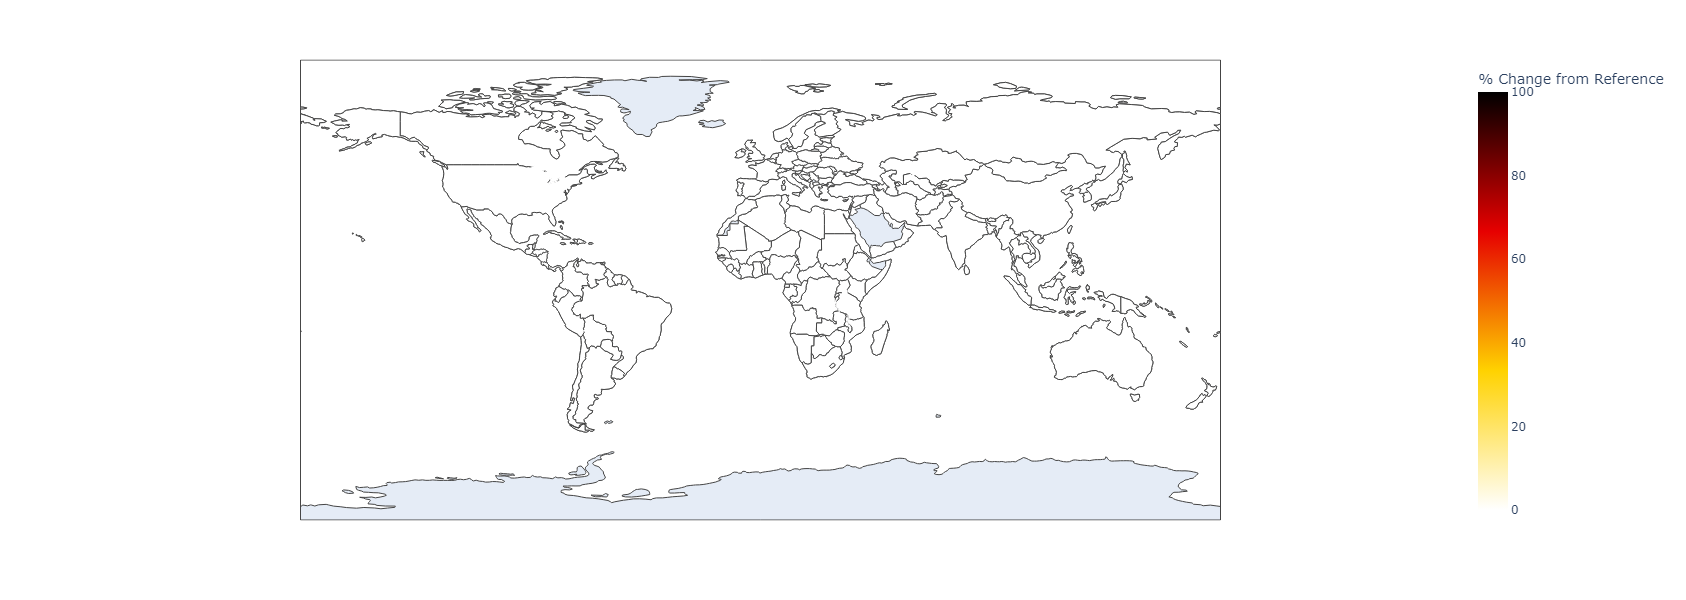

In [27]:
import plotly.express as px

fig = px.choropleth(merged_df, locations="ISO",
                    color="% Change from Reference", # lifeExp is a column of gapminder
                    hover_name="ISO", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Hot_r,
                   range_color=(0, 100),)
# Update layout for the entire figure
fig.update_layout(
    #title_text='Deforestation Attribution by Commodity',
    autosize=False,
    width=1000,
    height=600,
    showlegend=False,
)
fig.show()